In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load Data

In [ ]:
df_train = pd.read_csv('/content/kkw-train.csv')
df_test = pd.read_csv('/content/kkw-test.csv')

In [ ]:
df_test_clean = df_test.dropna()
df_test_clean.tail()

,sample_label,sample_name,source_type,reservoir_t,ph,na,k,ca,cl,b,sio2
5,6.0,UBL56_20,Well,241.99,8.05,630.0,114.00,14.1,965.0,25.80,460.0
6,7.0,WayNgarip_17,Hotspring,91.20,5.60,22.0,12.00,15.0,1.0,0.20,152.0
7,8.0,Datarajan_19,Hotspring,55.00,2.57,8.2,2.45,6.8,3.5,0.04,79.0
8,9.0,WayPanas_19,Hotspring,99.40,8.39,477.0,42.30,23.5,754.0,20.90,181.0
9,10.0,KukupWayPanas_19,Hotspring,98.80,8.55,437.0,35.40,18.4,684.0,19.10,151.0


## Penyesuaian dataset

In [ ]:
x_train = np.array(df_train[['ph','na','k','cl','b','sio2']])
y_train = np.array(df_train['reservoir_t'])
x_train_label = np.array(df_train[['sample_label']])

print(f'x_train: \n{x_train}\n')
print(f'y_train: \n{y_train}\n')
print(f'x_label: \n{x_train_label}')

x_train: 
[[8.32e+00 6.88e+02 1.15e+02 1.17e+03 3.39e+01 6.29e+02]
 [8.30e+00 6.63e+02 1.14e+02 1.14e+03 3.03e+01 6.83e+02]
 [8.45e+00 6.35e+02 1.09e+02 1.13e+03 3.29e+01 5.95e+02]
 [8.54e+00 6.57e+02 1.08e+02 1.11e+03 3.36e+01 5.69e+02]
 [8.50e+00 6.58e+02 1.08e+02 1.11e+03 3.31e+01 5.99e+02]
 [8.47e+00 6.65e+02 1.06e+02 1.13e+03 3.34e+01 5.46e+02]
 [8.30e+00 6.77e+02 1.15e+02 1.13e+03 3.32e+01 6.76e+02]
 [8.38e+00 6.77e+02 1.13e+02 1.10e+03 2.94e+01 6.31e+02]
 [8.41e+00 6.61e+02 1.17e+02 1.20e+03 2.97e+01 6.74e+02]
 [7.19e+00 6.11e+02 1.26e+02 1.11e+03 2.46e+01 5.29e+02]
 [8.50e+00 6.37e+02 1.10e+02 1.10e+03 3.07e+01 6.36e+02]
 [8.57e+00 7.00e+02 1.76e+02 1.10e+03 4.12e+01 9.06e+02]
 [7.85e+00 6.30e+02 1.05e+02 1.05e+03 2.99e+01 4.77e+02]
 [8.53e+00 6.59e+02 1.04e+02 1.09e+03 2.90e+01 5.56e+02]
 [7.77e+00 6.34e+02 1.23e+02 1.12e+03 2.97e+01 5.45e+02]
 [8.08e+00 7.15e+02 1.39e+02 1.13e+03 3.56e+01 9.55e+02]
 [7.29e+00 6.52e+02 1.04e+02 1.14e+03 2.69e+01 5.27e+02]
 [8.00e+00 3.50e+01 4

In [ ]:
x_test = np.array(df_test_clean[['ph','na','k','cl','b','sio2']])
y_test = np.array(df_test_clean['reservoir_t'])
x_test_label = np.array(df_test_clean[['sample_label']])

print(f'x_test: \n{x_test}\n')
print(f'y_test: \n{y_test}\n')
print(f'x_label: \n{x_test_label}')

x_test: 
[[7.460e+00 8.240e+02 1.890e+02 1.380e+03 4.200e+01 9.590e+02]
 [8.090e+00 6.510e+02 9.990e+01 1.110e+03 2.690e+01 4.830e+02]
 [7.880e+00 7.320e+02 1.170e+02 1.070e+03 3.330e+01 7.100e+02]
 [8.070e+00 7.630e+02 1.260e+02 1.230e+03 4.320e+01 7.700e+02]
 [8.100e+00 6.760e+02 1.050e+02 1.087e+03 3.060e+01 5.640e+02]
 [8.050e+00 6.300e+02 1.140e+02 9.650e+02 2.580e+01 4.600e+02]
 [5.600e+00 2.200e+01 1.200e+01 1.000e+00 2.000e-01 1.520e+02]
 [2.570e+00 8.200e+00 2.450e+00 3.500e+00 4.000e-02 7.900e+01]
 [8.390e+00 4.770e+02 4.230e+01 7.540e+02 2.090e+01 1.810e+02]
 [8.550e+00 4.370e+02 3.540e+01 6.840e+02 1.910e+01 1.510e+02]]

y_test: 
[285.   260.   270.41 278.94 270.46 241.99  91.2   55.    99.4   98.8 ]

x_label: 
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


# Machine learning model

## Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

print(f'mae: {mean_absolute_error(y_test,y_pred_lr)}')
print(f'rmse: {sqrt(mean_squared_error(y_test, y_pred_lr))}')

mae: 37.551789332813996
rmse: 42.459007861319435


## Support vector machine (SVM) model

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_sv = SVR(kernel='linear')
model_sv.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred_svr = model_sv.predict(x_test)

print(f'mae: {mean_absolute_error(y_test,y_pred_svr)}')
print(f'rmse: {sqrt(mean_squared_error(y_test, y_pred_svr))}')

mae: 39.17357006727669
rmse: 45.78932761938079


## Deep Neural Network (DNN) model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# preparing train and test dataset

target_train_dnn = df_train.reservoir_t
print(target_train_dnn)

train_dnn = df_train.drop(columns=['sample_label','reservoir_t','sample_name','source_type'],axis = 1)
train_dnn

0     282.00
1     265.00
2     264.35
3     254.60
4     267.34
5     264.01
6     282.98
7     253.36
8     271.85
9     255.00
10    268.69
11    259.23
12    235.52
13    261.01
14    263.43
15    282.00
16    258.81
17     37.70
18     55.00
19     97.50
20     97.60
21     37.40
22     47.20
23     98.90
24     96.30
Name: reservoir_t, dtype: float64


,ph,na,k,ca,cl,b,sio2
0,8.32,688.0,115.0,5.50,1170,33.90,629
1,8.30,663.0,114.0,6.10,1140,30.30,683
2,8.45,635.0,109.0,7.70,1130,32.90,595
3,8.54,657.0,108.0,7.60,1110,33.60,569
4,8.50,658.0,108.0,8.30,1110,33.10,599
5,8.47,665.0,106.0,7.80,1130,33.40,546
6,8.30,677.0,115.0,5.30,1130,33.20,676
7,8.38,677.0,113.0,5.60,1100,29.40,631
8,8.41,661.0,117.0,5.10,1200,29.70,674
9,7.19,611.0,126.0,7.25,1110,24.60,529


In [ ]:
target_test_dnn = df_test_clean.reservoir_t
print(target_test_dnn)

test_dnn = df_test_clean.drop(columns=['sample_label','reservoir_t','sample_name','source_type'],axis = 1)
test_dnn

0    285.00
1    260.00
2    270.41
3    278.94
4    270.46
5    241.99
6     91.20
7     55.00
8     99.40
9     98.80
Name: reservoir_t, dtype: float64


,ph,na,k,ca,cl,b,sio2
0,7.46,824.0,189.00,5.38,1380.0,42.00,959.0
1,8.09,651.0,99.90,9.50,1110.0,26.90,483.0
2,7.88,732.0,117.00,4.60,1070.0,33.30,710.0
3,8.07,763.0,126.00,3.70,1230.0,43.20,770.0
4,8.10,676.0,105.00,6.60,1087.0,30.60,564.0
5,8.05,630.0,114.00,14.10,965.0,25.80,460.0
6,5.60,22.0,12.00,15.00,1.0,0.20,152.0
7,2.57,8.2,2.45,6.80,3.5,0.04,79.0
8,8.39,477.0,42.30,23.50,754.0,20.90,181.0
9,8.55,437.0,35.40,18.40,684.0,19.10,151.0


In [ ]:
#@title
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Dense(32, input_dim=7,  activation='relu'))

# hidden layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,593
Trainable params: 6,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_dnn, target_train_dnn, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 110.9440 - mean_absolute_error: 110.9440
Epoch 2/200
1/1 [==============================] - 0s 31ms/step - loss: 75.8460 - mean_absolute_error: 75.8460
Epoch 3/200
1/1 [==============================] - 0s 24ms/step - loss: 42.6209 - mean_absolute_error: 42.6209
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 23.9364 - mean_absolute_error: 23.9364
Epoch 5/200
1/1 [==============================] - 0s 35ms/step - loss: 38.6258 - mean_absolute_error: 38.6258
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 39.9389 - mean_absolute_error: 39.9389
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 33.4693 - mean_absolute_error: 33.4693
Epoch 8/200
1/1 [==============================] - 0s 24ms/step - loss: 22.6389 - mean_absolute_error: 22.6389
Epoch 9/200
1/1 [==============================] - 0s 26ms/step - loss: 23.5763 - mean_absolute_error: 23.5763
E

In [ ]:
y_pred_dnn = model.predict(test_dnn)

print(f'mae: {mean_absolute_error(y_test,y_pred_dnn)}')
print(f'rmse: {sqrt(mean_squared_error(y_test, y_pred_dnn))}')

mae: 17.496678649902343
rmse: 22.162084343835733


# Visualisasi

## Linear regression model

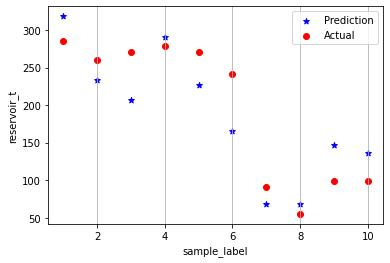

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test_label, y_pred_lr, marker='*', c='b')
plt.scatter(x_test_label, y_test, marker='o', c='r')
plt.xlabel('sample_label')
plt.ylabel('reservoir_t')
plt.legend(['Prediction','Actual'])
plt.grid(axis='x')
plt.show()

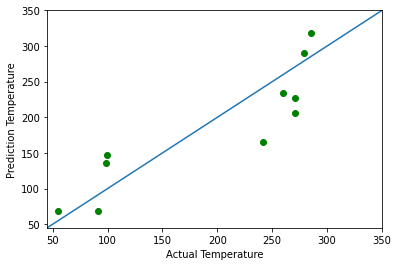

In [ ]:
plt.scatter(y_test, y_pred_lr, marker='o', c='g')
lims=[45,350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

plt.xlabel('Actual Temperature')
plt.ylabel('Prediction Temperature')
plt.show()

## SVM model

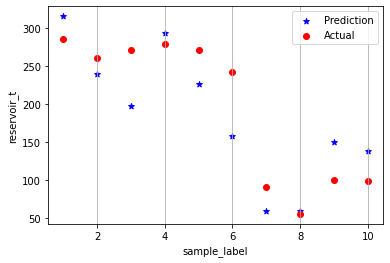

In [ ]:
plt.scatter(x_test_label, y_pred_svr, marker='*', c='b')
plt.scatter(x_test_label, y_test, marker='o', c='r')
plt.xlabel('sample_label')
plt.ylabel('reservoir_t')
plt.legend(['Prediction','Actual'])
plt.grid(axis='x')
plt.show()

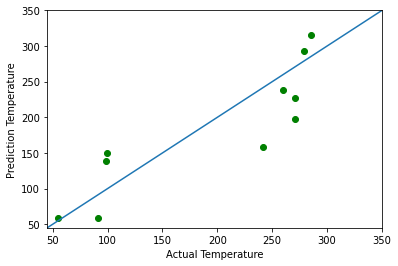

In [ ]:
plt.scatter(y_test, y_pred_svr, marker='o', c='g')
lims=[45,350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

plt.xlabel('Actual Temperature')
plt.ylabel('Prediction Temperature')
plt.show()

## DNN model

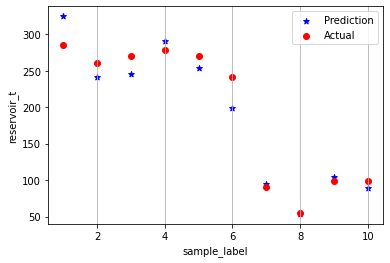

In [ ]:
plt.scatter(x_test_label, y_pred_dnn, marker='*', c='b')
plt.scatter(x_test_label, y_test, marker='o', c='r')
plt.xlabel('sample_label')
plt.ylabel('reservoir_t')
plt.legend(['Prediction','Actual'])
plt.grid(axis='x')
plt.show()

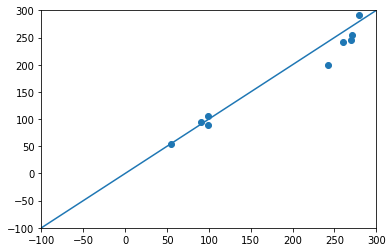

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(target_test_dnn, y_pred_dnn)
lims=[-100,300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
plt.show()